In [30]:
!pip install transformers sentencepiece accelerate


In [31]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
import json, os
from datetime import datetime


In [32]:
model_name = "google/flan-t5-base"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)


In [53]:
def generate_quiz(grade, subject, topic, n=5):
    prompt = f"""
    You are a school teacher creating an exam.

    Generate exactly {n} clear, direct quiz questions
    for a Grade {grade} student in the subject {subject}
    on the topic "{topic}". Maintain the standard of each question.
    Focus deeply on the subject core.

    The questions must test understanding of the topic.
    Do NOT explain anything.
    Do NOT mention the grade.
    Only output the questions. Ask question deeply from the {subject} only.
    Do not ask questions out of the scope of subject {subject} and topic {topic}.
    """

    inputs = tokenizer(prompt, return_tensors="pt", truncation=True)
    outputs = model.generate(**inputs, max_length=350)
    text = tokenizer.decode(outputs[0], skip_special_tokens=True)

    questions = [q.strip() for q in text.split("?") if len(q.strip()) > 5]
    return [q + "?" for q in questions][:n]


In [54]:
def evaluate_answers(answers):
    return sum(1 for a in answers if len(a.strip()) > 5) / len(answers)

def update_memory(old_strength, score):
    return round(0.6 * old_strength + 0.4 * score, 3)


In [55]:
DB_FILE = "progress.json"

def load_db():
    if os.path.exists(DB_FILE):
        with open(DB_FILE, "r") as f:
            return json.load(f)
    return {}

def save_db(db):
    with open(DB_FILE, "w") as f:
        json.dump(db, f, indent=2)

def update_progress(subject, topic, memory_strength, score):
    db = load_db()
    db.setdefault(subject, {})
    db[subject].setdefault(topic, [])
    db[subject][topic].append({
        "timestamp": str(datetime.now()),
        "memory_strength": memory_strength,
        "score": score
    })
    save_db(db)


In [57]:
grade = int(input("Enter grade (6–12): "))
subject = input("Enter subject: ")
topic = input("Enter topic: ")

questions = generate_quiz(grade, subject, topic)

answers = []
for q in questions:
    print("\n" + q)
    answers.append(input("Your answer: "))

score = evaluate_answers(answers)

db = load_db()
old_strength = 0.5
if subject in db and topic in db[subject]:
    old_strength = db[subject][topic][-1]["memory_strength"]

new_strength = update_memory(old_strength, score)

update_progress(subject, topic, new_strength, score)

print("\n--- Result ---")
print("Score:", score)
print("Updated memory strength:", new_strength)
print("Saved to progress.json")


Enter grade (6–12): 9
Enter subject: Biology
Enter topic: Lungs

What is the best way to test your knowledge of lung disease?
Your answer: ECG

--- Result ---
Score: 0.0
Updated memory strength: 0.3
Saved to progress.json


In [58]:
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import Image, display

def update_memory_graph():
    with open("progress.json") as f:
        db = json.load(f)

    records = []
    for subject in db:
        for topic in db[subject]:
            for entry in db[subject][topic]:
                records.append(entry)

    records.sort(key=lambda x: datetime.fromisoformat(x["timestamp"]))

    attempts = list(range(1, len(records) + 1))
    memory_values = [r["memory_strength"] for r in records]

    plt.figure()
    plt.plot(attempts, memory_values, marker='o')
    plt.xlabel("Study Attempts Over Time")
    plt.ylabel("Memory Strength")
    plt.title("Memory Retention / Decay Over Time")
    plt.savefig("memory_over_time.png")
    plt.close()

    display(Image(filename="memory_over_time.png"))


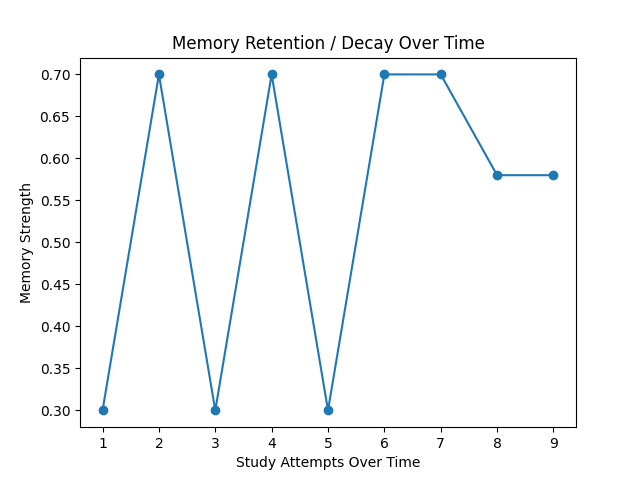

Memory graph updated → memory_over_time.png


In [52]:
update_memory_graph()
print("Memory graph updated → memory_over_time.png")


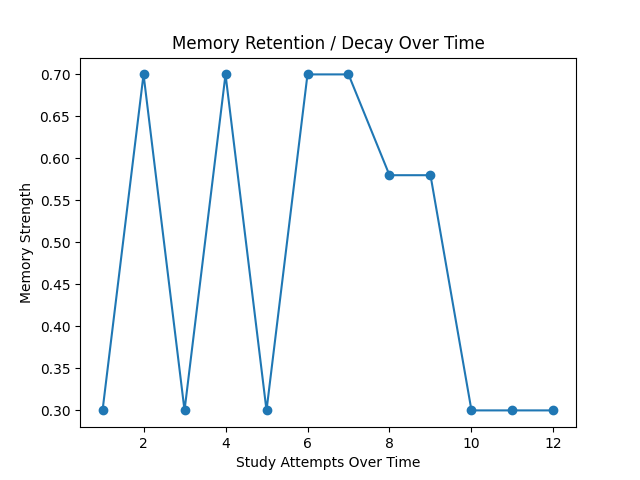


--- Result ---
Score: 0.0
Updated memory strength: 0.3
Memory graph updated → memory_over_time.png


In [59]:
update_progress(subject, topic, new_strength, score)
update_memory_graph()

print("\n--- Result ---")
print("Score:", score)
print("Updated memory strength:", new_strength)
print("Memory graph updated → memory_over_time.png")



In [61]:
%%writefile quiz.py
print("Hello from the quiz")


Writing quiz.py


In [62]:
!git clone https://github.com/SreyaMaxwel/Loci.git


Cloning into 'Loci'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 38 (delta 2), reused 34 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 12.90 KiB | 6.45 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [64]:
!mv quiz.py Loci/


In [65]:
%cd Loci


/content/Loci


In [67]:
!git add quiz.py


In [68]:
!git commit -m "Added quiz engine"


Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@1df114679e9c.(none)')


In [72]:
!git config --global user.email "sreyamaxwel@gmail.com"
!git config --global user.name "Sreya Maxwel"

In [73]:
!git push


fatal: could not read Username for 'https://github.com': No such device or address


In [75]:
%cd /content/Loci


/content/Loci


In [77]:
git status


SyntaxError: invalid syntax (ipython-input-339777499.py, line 1)

In [79]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   quiz.py



In [80]:
%cd /content/Loci


/content/Loci


In [81]:
!ls


backend  data  quiz.py	README.md  src


In [82]:
!mv /content/Adaptive_quiz.ipynb /content/Loci/


mv: cannot stat '/content/Adaptive_quiz.ipynb': No such file or directory


In [84]:
!ls /content


Loci  memory_over_time.png  memory_plot.png  progress.json  sample_data


In [85]:
import os
print(os.getcwd())



/content/Loci


In [86]:
!pwd


/content/Loci


In [87]:
%cd /content/Loci


/content/Loci


In [89]:
!ls


backend  data  quiz.py	README.md  src


In [90]:
!find /content -name "*.ipynb"


In [91]:
!find /content -name "*.ipynb"
